<a href="https://colab.research.google.com/github/ANKITHDEEGOJU/AI-ML-IITH-Course-Work/blob/MASTER/Python_Probability_Statistics_Sheet_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as pg
import matplotlib as plt

In [ ]:
a=["Heads","Tails"]
number_of_tosses=100
df=np.random.choice(a,number_of_tosses,replace=True,p=None)
ser=pd.Series(df)
data=ser.value_counts()
px.bar(x=data.keys(),y=data.values)


In [ ]:
#Creating the formal function for tossing a coin
def toss_a_coin(number_of_tosses):
  Samplespace=["Heads","Tails"]
  outcomes=pd.Series(np.random.choice(Samplespace,number_of_tosses,replace=True)).value_counts()
  return px.bar(x=outcomes.keys(),y=outcomes.values)

toss_a_coin(40)

In [ ]:
no_of_trails=30
np.random.randint(1,30,no_of_trails,dtype=int)

array([ 5,  6, 13,  9, 22, 18, 24, 19, 26, 29,  3, 27, 20, 19, 26, 27, 23,
       16,  6,  2, 21, 13, 27, 25,  9,  7, 22, 21, 26, 22])

In [ ]:
def throw_dice(number_of_throws):
  return pd.Series(np.random.randint(1,7,number_of_throws))
result=throw_dice(30).value_counts()
px.bar(x=result.keys(),y=result.values)

Derived probability Distribution

In [ ]:
#Binomial Distribution
a=['Heads','Tails']
num_of_trials=10
# a=np.random.choice(a,num_of_trials,replace=True,p=[0.5,0.5])
# a=np.sum((np.random.choice(a,num_of_trials,replace=True,p=[0.5,0.5]))=='Heads')X
b=pd.Series([np.sum(np.random.choice(a,500,replace=True,p=[0.5,0.5])=='Heads') for _ in range(10000)]).value_counts()
px.bar(x=b.keys(),y=b.values)


In [ ]:
#Throwing a dice
import plotly.graph_objects as pg
list_of_shots=[10,100,10000,100000]
results={shots:throw_dice(shots) for shots in list_of_shots}
fig=pg.Figure([pg.Bar(x=results.value_counts().keys(),y=results.value_counts().values / shots,)
for shots,results in results.items()])
fig.add_shape(type='line',x0=0.5,y0=1/6,x1=6.5,y1=1/6,line=dict(color='Red',))
fig.show()


In [ ]:
#Videos

#P-hacking
#Regression to Mean



Expectation is the sum of probalities associated with each weighed outcome.
$$E = \sum_{i \in S} P_i V_i$$

In [ ]:
import numpy as np

Samplespace=['A','2','3','4','5','6','7','8','9','10','K','Q','J']*4
ss=np.array(Samplespace)

def select(a):

  for i in range(52):
    arr=np.random.choice(a,1,replace=False)
    print("The randomly selected element is ",arr)
    a=np.delete(a,np.where(a == arr)[0][0])

    if(arr=='A'):
      print("Number of non ace cards",i)
      break


select(ss)

The randomly selected element is  ['J']
The randomly selected element is  ['10']
The randomly selected element is  ['K']
The randomly selected element is  ['3']
The randomly selected element is  ['9']
The randomly selected element is  ['2']
The randomly selected element is  ['A']
Number of non ace cards 6


In [ ]:
#A bit more advanced version
import numpy as np

#Deck Card Generation
def deck_card_generation():
  values=['A','1','2','3','4','5','6','7','8','9','10','J','Q','K']
  ranks=['H','S','C','D']
  deck_of_cards=[value + rank for value in values for rank in ranks]
  return deck_of_cards

# a=deck_card_generation()


#Trail Generation -->number_of_trails-->For the number of repetiotions of the experiment
#show_trails--->Number of trails which we want to receive

def number_of_cards_drawn_before_ace(number_of_trials,show_trials):
  cards_thrown_counts=[]
  for experiment in range(number_of_trials):
    deck_of_cards=deck_card_generation()
    cards_thrown=0
    cards_pile=[] #Empty Array for storing all the throen out cards before ACE
    #For each individual trail
    while len(deck_of_cards)>0:
      picked_card=np.random.choice(deck_of_cards)
      if picked_card[0]=='A':
        break
      cards_pile.append(picked_card)
      cards_thrown=cards_thrown+1
    #Individual Trial Completed
    if experiment < show_trials:
      print(cards_thrown,'Cards are thrown out before drawing out ACE:',' '.join(cards_pile))
    #For calculating mean of all the number of throws required to draw out a single ace card
    cards_thrown_counts.append(cards_thrown)
    # print(cards_thrown_counts)
  return np.mean(cards_thrown_counts),cards_thrown_counts

Mean_of_cards_thrown,cards_thrown_counts=number_of_cards_drawn_before_ace(10000,10)
print(f'\n{Mean_of_cards_thrown} are the average cards tossed befor drawing out an ACE.')

33 Cards are thrown out before drawing out ACE: 4H 4C KS KS JC KC 10H KD 6D 10D 1S 7C 10C 6H 9S 7S 9D 5S 10C 2S 1H JS 2D 5D 5D 1S 2S 5S 7S KD QH KC 1H
18 Cards are thrown out before drawing out ACE: 4D 10D 3D 1D JD QD KH 9H 8D KC 3S 7C 2C 9S 7C 4S 7C 2H
23 Cards are thrown out before drawing out ACE: KD 1D 7S KS 4C 5H QC JS 6S 2D 5C JH 10C QD 7S 5S 6H 6C 2S 7C 4C JS 8D
2 Cards are thrown out before drawing out ACE: 8D 6S
0 Cards are thrown out before drawing out ACE: 
12 Cards are thrown out before drawing out ACE: 5C 4D 7S 2S JC QC QC 1D 7H 10S 7S 2S
15 Cards are thrown out before drawing out ACE: 4C 3S 10H 2H KS KH QS 9H 6S 10D 2S 3D 2C 2C 9H
28 Cards are thrown out before drawing out ACE: 7C 4C KS JC 8S JS 9C 4D 4S 1S 4H 4D JH QH 9D JC 8S QC JH QD 1D 4S 2H JD QS 3C 8H 3C
0 Cards are thrown out before drawing out ACE: 
12 Cards are thrown out before drawing out ACE: QC 3S 5S 9S 2H 8C 10H 10H 1H 10H 4H 2C

12.9566 are the average cards tossed befor drawing out an ACE.


In [ ]:
#GRaphical Representatio of our Data
import pandas as pd
import plotly.graph_objects as pg
results=pd.Series(cards_thrown_counts)
fig=pg.Figure([pg.Bar(x=results.value_counts().keys(),y=results.value_counts().values)])
fig.show()

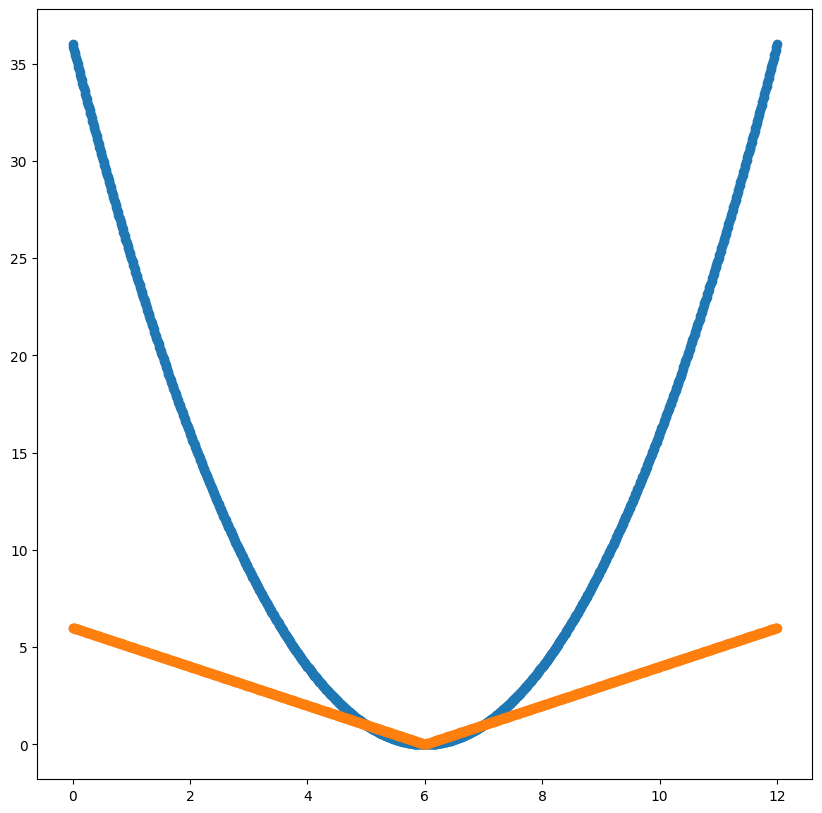

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

plt.figure(figsize=(10,10)) #For dimensions of the graph

measurements=np.linspace(0,12,1000)
plt.scatter(measurements,(measurements-6) ** 2,label='Sqaured Error')#Takes two parameters an array and the operation to be performed on each elemnt in array
plt.scatter(measurements,abs(measurements-6),label='Absolute Error')
plt.show()